In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LinReg  
from sklearn.linear_model import Lasso       
from sklearn.linear_model import Ridge      
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR


In [2]:
#%pip install lazypredict

In [3]:
"""%pip install xgboost

%pip install catboost

%pip install lightgbm"""

'%pip install xgboost\n\n%pip install catboost\n\n%pip install lightgbm'

In [4]:
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from lazypredict.Supervised import LazyRegressor 

In [5]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')

In [6]:
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')

In [7]:
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')

In [8]:
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [9]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37


In [10]:
modelo_num = mad_total.drop(columns=['distrito_€/m2','€/m2','zona','distrito'])

In [11]:
modelo = mad_total.drop(columns=['distrito_€/m2','€/m2'])

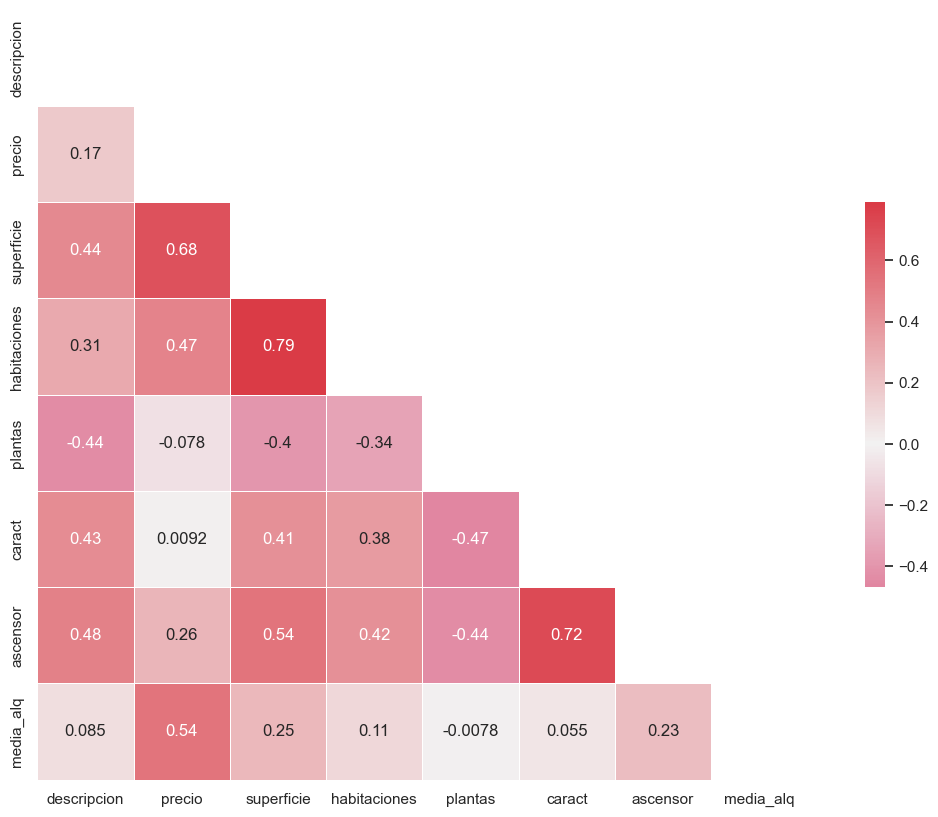

In [12]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(modelo_num.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [13]:
X = modelo.drop('precio', axis=1)

y = modelo.precio

In [14]:
X = X.drop(columns=['media_alq','caract'])

In [15]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28627, 7), (7157, 7), (28627,), (7157,))

In [16]:
"""from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)"""

'from lazypredict.Supervised import LazyRegressor\n\nreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)\n\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\n\nprint(models)'

In [17]:
X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)

In [18]:
X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)

In [19]:
X_train

,descripcion,superficie,habitaciones,plantas,ascensor,zona_exterior,distrito_barajas,distrito_barrio de salamanca,distrito_carabanchel,distrito_centro,distrito_chamartin,distrito_chamberi,distrito_ciudad lineal,distrito_corredor de henares,distrito_fuencarral,distrito_hortaleza,distrito_latina,distrito_moncloa,distrito_moratalaz,distrito_noroeste,distrito_norte,distrito_puente de vallecas,distrito_retiro,distrito_san blas,distrito_sur,distrito_sureste,distrito_suroeste,distrito_tetuan,distrito_usera,distrito_vicalvaro,distrito_villa de vallecas,distrito_villaverde
24788,1,220,3,-4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,51,2,-2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31702,0,112,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35765,1,1000,7,-4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31782,0,107,4,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,139,5,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6265,0,100,3,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11284,0,110,4,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,67,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()
svr=SVR()
rfr=RFR(random_state=42)
etr=ETR(random_state=42)
gbr=GBR(random_state=42)
xgbr=XGBR(random_state=42)
lazy=LazyRegressor(random_state=42)
ctr=CTR(random_state=42)
lgbmr=LGBMR(random_state=42)

In [21]:
"""linreg.fit(X_train, y_train)   # sacar los betas, ajustate

lasso.fit(X_train, y_train)

ridge.fit(X_train, y_train)

elastic.fit(X_train, y_train)"""

'linreg.fit(X_train, y_train)   # sacar los betas, ajustate\n\nlasso.fit(X_train, y_train)\n\nridge.fit(X_train, y_train)\n\nelastic.fit(X_train, y_train)'

In [22]:
#svr.fit(X_train, y_train)

rfr.fit(X_train, y_train)

etr.fit(X_train, y_train)

ExtraTreeRegressor(random_state=42)

In [23]:
gbr.fit(X_train, y_train)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
#lazy.fit(X_train, X_test, y_train, y_test)

In [25]:
from sklearn.metrics import mean_squared_error as mse

In [26]:
"""from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor"""

'from sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor'

In [27]:
from sklearn.model_selection import GridSearchCV 

In [28]:
"""modelo1 = RFR()

modelo1.fit(X_train, y_train)


#R2
train_score = modelo1.score(X_train, y_train)
test_score = modelo1.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)"""

"modelo1 = RFR()\n\nmodelo1.fit(X_train, y_train)\n\n\n#R2\ntrain_score = modelo1.score(X_train, y_train)\ntest_score = modelo1.score(X_test, y_test)\n\nprint ('Train: ',train_score)\nprint('Test: ', test_score)"

In [29]:
"""params = {'n_estimators': [10, 20, 50, 100, 150, 200, 300],
          'max_depth': [5, 10, 20, 25]}"""

"params = {'n_estimators': [10, 20, 50, 100, 150, 200, 300],\n          'max_depth': [5, 10, 20, 25]}"

In [30]:
"""def grid(modelo, params):

    g = GridSearchCV(modelo,                    # modelo de ML de sklearn
                     params,                    # dictio de parametros
                     cv=5,                      # cross-validation, 5 cortes
                     return_train_score=True,   # error de entrenamiento
                     n_jobs=-1                  # usa todos los cores
                    )


    g.fit(X, y)

    # ajuste de todos los modelos y combinaciones
    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))


    return g.best_estimator_.fit(X_train, y_train)"""

"def grid(modelo, params):\n\n    g = GridSearchCV(modelo,                    # modelo de ML de sklearn\n                     params,                    # dictio de parametros\n                     cv=5,                      # cross-validation, 5 cortes\n                     return_train_score=True,   # error de entrenamiento\n                     n_jobs=-1                  # usa todos los cores\n                    )\n\n\n    g.fit(X, y)\n\n    # ajuste de todos los modelos y combinaciones\n    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))\n    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))\n    print('Mejores parametros: {}'.format(g.best_params_))\n    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))\n\n\n    return g.best_estimator_.fit(X_train, y_train)"

In [31]:
#modelo_grid = grid(RFR(), params)

In [32]:
#modelo_grid.score(X_train, y_train)

In [33]:
#modelo_grid.score(X_test, y_test)

In [34]:
"""y_pred = linreg.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'y_pred = linreg.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [35]:
"""y_pred = lasso.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'y_pred = lasso.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [36]:
"""y_pred = ridge.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'y_pred = ridge.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [37]:
"""y_pred = elastic.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'y_pred = elastic.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [38]:
"""y_pred = svr.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'y_pred = svr.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [39]:
"""rfr = RFR(n_estimators=300, random_state=10)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'rfr = RFR(n_estimators=300, random_state=10)\n\nrfr.fit(X_train, y_train)\n\ny_pred = rfr.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [40]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 0.9504836967951458,
 'superficie': 61.743345226097766,
 'habitaciones': 6.359299005175243,
 'plantas': 2.3220656163844464,
 'ascensor': 0.7166469056432725,
 'zona_exterior': 12.54368044401977,
 'distrito_barajas': 0.00722063045825389,
 'distrito_barrio de salamanca': 6.753468829156197,
 'distrito_carabanchel': 0.02293583611730073,
 'distrito_centro': 1.1502639156267218,
 'distrito_chamartin': 1.3430140775802355,
 'distrito_chamberi': 0.7507388660656685,
 'distrito_ciudad lineal': 0.05426100873156808,
 'distrito_corredor de henares': 0.03251021615778142,
 'distrito_fuencarral': 0.16338587654922562,
 'distrito_hortaleza': 0.3106341103029763,
 'distrito_latina': 0.011910574641236214,
 'distrito_moncloa': 0.2623773585832184,
 'distrito_moratalaz': 0.0037620730484080257,
 'distrito_noroeste': 1.1009090198018217,
 'distrito_norte': 2.1687966501694094,
 'distrito_puente de vallecas': 0.025314223705068133,
 'distrito_retiro': 0.6002607690400199,
 'distrito_san blas': 0.04553121

In [41]:
y_pred = etr.predict(X_test)

mse(y_test, y_pred, squared=False)

410831.5404736663

In [42]:
y_pred = gbr.predict(X_test)

mse(y_test, y_pred, squared=False)

396234.0687624154

In [43]:
y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

371639.6361846248

In [44]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 0.9504836967951458,
 'superficie': 61.743345226097766,
 'habitaciones': 6.359299005175243,
 'plantas': 2.3220656163844464,
 'ascensor': 0.7166469056432725,
 'zona_exterior': 12.54368044401977,
 'distrito_barajas': 0.00722063045825389,
 'distrito_barrio de salamanca': 6.753468829156197,
 'distrito_carabanchel': 0.02293583611730073,
 'distrito_centro': 1.1502639156267218,
 'distrito_chamartin': 1.3430140775802355,
 'distrito_chamberi': 0.7507388660656685,
 'distrito_ciudad lineal': 0.05426100873156808,
 'distrito_corredor de henares': 0.03251021615778142,
 'distrito_fuencarral': 0.16338587654922562,
 'distrito_hortaleza': 0.3106341103029763,
 'distrito_latina': 0.011910574641236214,
 'distrito_moncloa': 0.2623773585832184,
 'distrito_moratalaz': 0.0037620730484080257,
 'distrito_noroeste': 1.1009090198018217,
 'distrito_norte': 2.1687966501694094,
 'distrito_puente de vallecas': 0.025314223705068133,
 'distrito_retiro': 0.6002607690400199,
 'distrito_san blas': 0.04553121

In [45]:
print(f"Test accuracy: {rfr.score(X_test, y_test):0.4f}")

Test accuracy: 0.8147


In [46]:
mad_total.precio.mean()

637370.6351721439

In [47]:
mse(y_test, y_pred, squared=False)*100/mad_total.precio.mean()

58.308245732759666

In [48]:
df1 = mad_total[mad_total['distrito']=='arganzuela']

In [49]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2'])

In [50]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [51]:
X = X.drop(columns=['zona','distrito','media_alq'])

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

X[['descripcion', 'superficie', 'habitaciones', 'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones', 'plantas', 'caract', 'ascensor']])

In [54]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((539, 6), (135, 6), (539,), (135,))

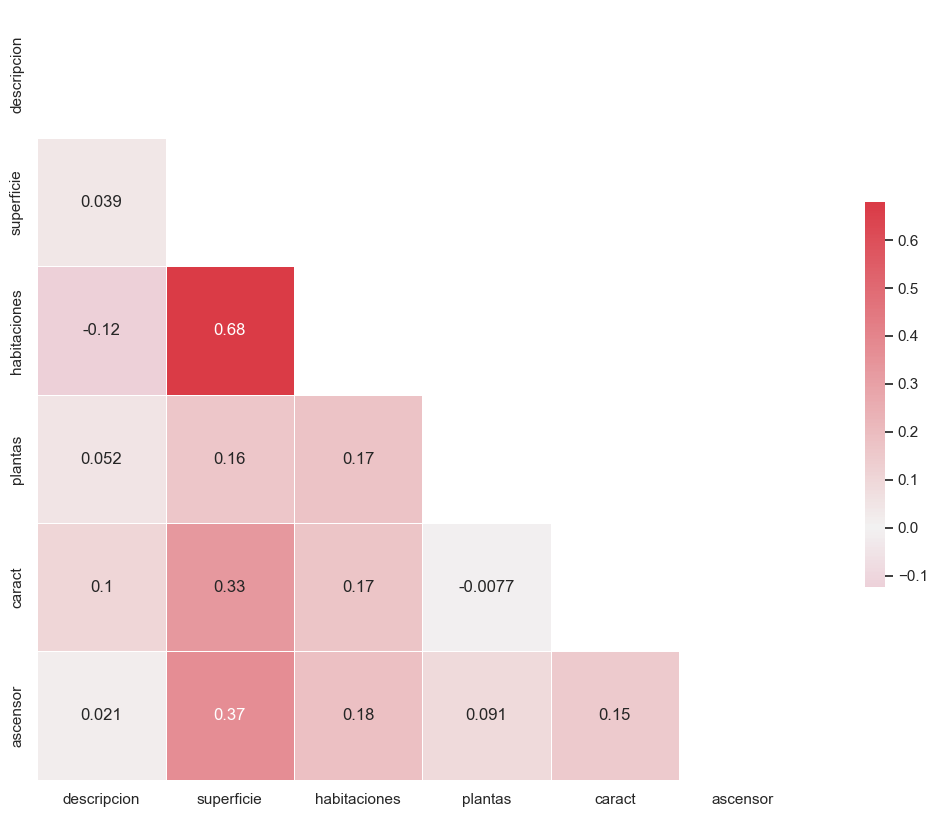

In [55]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [56]:
rfr = RFR(n_estimators=500, random_state=20)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

75287.23363002898

In [57]:
dict(zip(X.columns, rfr.feature_importances_*100))

{'descripcion': 1.8697503247380465,
 'superficie': 84.12951860319997,
 'habitaciones': 3.8435516988685623,
 'plantas': 8.561409906865581,
 'caract': 1.161227121161441,
 'ascensor': 0.4345423451663937}

In [58]:
print(f"Test accuracy: {rfr.score(X_test, y_test):0.4f}")

Test accuracy: 0.8706


In [59]:
df1.precio.mean()

435468.09643916914

In [60]:
mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

17.288805826570098